In [158]:
#matplotlib inline

#  Interpolation

## Interpolation in 1D

Adapted from https://scipy-lectures.org/intro/scipy/auto_examples/plot_interpolation.html
    accessed 23 November 2019

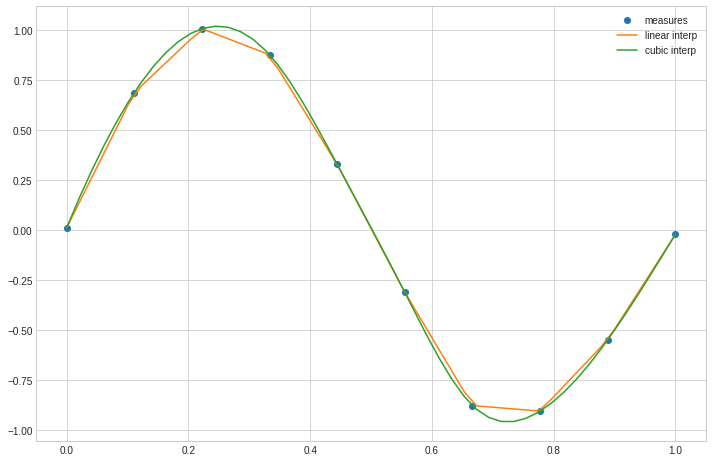

In [159]:
# Generate data
import numpy as np
np.random.seed(0)
measured_time = np.linspace(0, 1, 10)
noise = 1e-1 * (np.random.random(10)*2 - 1)
measures = np.sin(2 * np.pi * measured_time) + noise

# Interpolate it to new time points
from scipy.interpolate import interp1d
linear_interp = interp1d(measured_time, measures)
interpolation_time = np.linspace(0, 1, 50)
linear_results = linear_interp(interpolation_time)
cubic_interp = interp1d(measured_time, measures, kind='cubic')
cubic_results = cubic_interp(interpolation_time)

# Plot the data and the interpolation
from matplotlib import pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(measured_time, measures, 'o', ms=6, label='measures')
plt.plot(interpolation_time, linear_results, label='linear interp')
plt.plot(interpolation_time, cubic_results, label='cubic interp')
plt.legend()
plt.show()

## Exemplo dado na apresentação: 

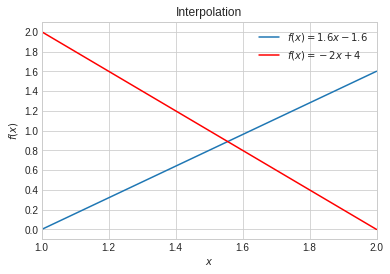

In [160]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
fig = plt.figure()
ax = plt.axes()
ax.set(xlim=(1, 2), xlabel='$x$', ylabel='$f(x)$', title='Interpolation');
x = np.linspace(1, 2, 100)
plt.yticks(np.linspace(0 , 2 , 11))
plt.plot(x, 1.6*x -1.6, linestyle='solid', label='$f(x) = 1.6x - 1.6$')
plt.plot(x, -2*x + 4, linestyle='solid',  color='red', label='$f(x) = -2x + 4$')

plt.legend();

In [161]:
# given points are (x,y) = (1,2), (2,1.6)
x = np.array([1,2])
y = np.array([2,1.6])
# create an object to represent linear interpolation
linear_interp = interp1d(x,y)
# find value at x value specfied (xinterp=1.3)
xinterp=1.3
yinterp = linear_interp(xinterp)
print(f'interpolating (1,2) and (2,1.6) at x = {xinterp} gives {yinterp}')
print('\n 0.3 * 1.6 + 0.7 * 2.0 = 1.4 + 0.48 + 1.88')

interpolating (1,2) and (2,1.6) at x = 1.3 gives 1.88

 0.3 * 1.6 + 0.7 * 2.0 = 1.4 + 0.48 + 1.88


## Interpolation in 2D (bilinear interpolation)

In [162]:
from scipy import interpolate
x = np.array([[0,1],[0,1]])
y = np.array([[0,0],[1,1]]) 
# i.e order of values for rho = 
#[[(0,0),(1,0)],
# [(0,1),(1,1)]]

z = np.array([[1,3],[2,4]])
print('x=',x)
print('y=',y)
print('z-',z)
f = interpolate.interp2d(x, y, z, kind='linear')

#interpolate at x = 0.7, y = 0.2 using "f"
xinterp = 0.7
yinterp = 0.2
zinterp = f(xinterp, yinterp)
print(f'value of z interpolated at ({xinterp},{yinterp}) is {zinterp}')

x= [[0 1]
 [0 1]]
y= [[0 0]
 [1 1]]
z- [[1 3]
 [2 4]]
value of z interpolated at (0.7,0.2) is [2.6]


### Interpolation of a function
Example adapted from:
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.interp2d.html
    Accessed 23 November 2019

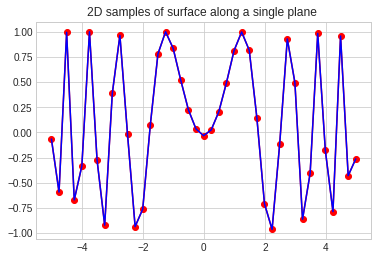

In [163]:
#Construct a 2-D grid and interpolate on it:

from scipy import interpolate
x = np.arange(-5.01, 5.01, 0.25)
y = np.arange(-5.01, 5.01, 0.25)
xx, yy = np.meshgrid(x, y)
z = np.sin(xx**2+yy**2)
# Define interpolation function, f
f = interpolate.interp2d(x, y, z, kind='cubic')


plt.plot(x, z[0, :], 'ro-', x, z[0, :], 'b-')
plt.title('2D samples of surface along a single plane ')
plt.show()

### Create 3D plot of surface, sampled

xgrid (41, 41) ygrid (41, 41) z (41, 41)


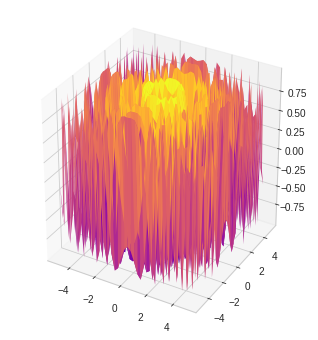

In [164]:


from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

xgrid, ygrid = np.meshgrid(x, y)

print(f'xgrid {np.shape(xgrid)} ygrid {np.shape(ygrid)} z {np.shape(z)}')
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1,2,1,projection='3d')
surf = ax.plot_surface(xgrid, ygrid, z, linewidth=0, cmap=cm.plasma)
plt.show()


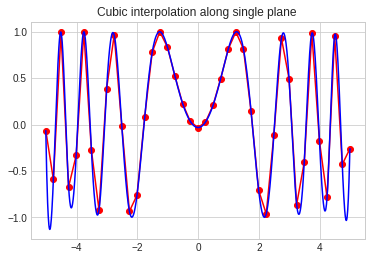

In [165]:
#Now use the obtained interpolation function and plot the result:

# Create finer mesh for cubic interpolation
xnew = np.arange(-5.01, 5.01, 1e-2)
ynew = np.arange(-5.01, 5.01, 1e-2)
# Form new values of z from cubic interpolation
znew = f(xnew, ynew)

# Plot cubic interpolated points in blue
plt.plot(x, z[0, :], 'ro-', xnew, znew[0, :], 'b-')
plt.title('Cubic interpolation along single plane ')
plt.show()

### 3D surface by cubic interpolation

xgrid (1002, 1002) ygrid (1002, 1002) z (1002, 1002)


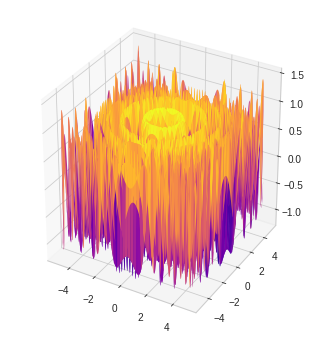

In [166]:
xgrid, ygrid = np.meshgrid(xnew, ynew)

print(f'xgrid {np.shape(xgrid)} ygrid {np.shape(ygrid)} z {np.shape(znew)}')
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1,2,1,projection='3d')
surf = ax.plot_surface(xgrid, ygrid, znew, linewidth=0, cmap=cm.plasma)
plt.show()


## Interpolation using convolution

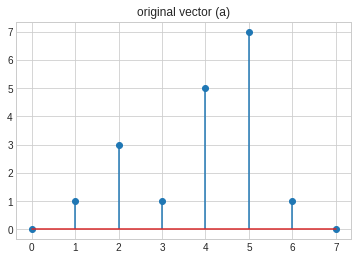

arr_tuple= (array([0, 1, 3, 1, 5, 7, 1, 0]), array([0., 0., 0., 0., 0., 0., 0., 0.]))
[0. 1. 3. 1. 5. 7. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
interleaved version of a (linear interp) = [0. 0. 1. 0. 3. 0. 1. 0. 5. 0. 7. 0. 1. 0. 0. 0.]


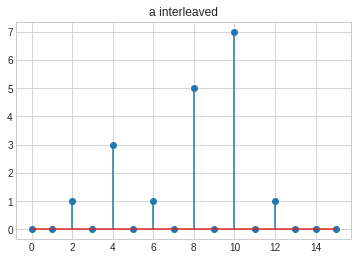

In [167]:


# define function for interleaving a vector with zeros (upsample)
def upsample(a):
    len_a, = np.shape(a)
    b = np.zeros(len_a)
    arr_tuple = (a,b)
    print(f'arr_tuple= {arr_tuple}')
    print(np.vstack(arr_tuple).reshape((-1)))
    ainterleaved = np.vstack(arr_tuple).reshape((-1,), order='F')
    return(ainterleaved)

from scipy import ndimage
from matplotlib import pyplot as plt

a = np.array([0,1,3,1,5,7,1,0])
len_a, = np.shape(a)
x = np.arange(0, len_a, 1)

plt.stem(x,a, use_line_collection=True)
plt.title('original vector (a)')
plt.show()

ainterleaved = upsample(a)
len_ainterleaved, = np.shape(ainterleaved)
x = np.arange(0, len_ainterleaved, 1)

print(f'interleaved version of a (linear interp) = {ainterleaved}')

plt.stem(x,ainterleaved, use_line_collection=True)
plt.title('a interleaved')
plt.show()





## Plot interleaved signal again, then convolve with linear interpolation kernel and plot:

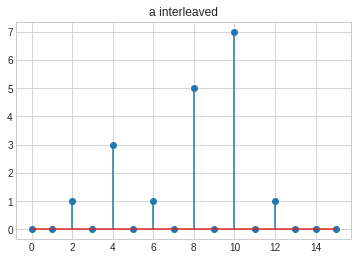

interpolated version of a (linear interp) = [0.  0.5 1.  2.  3.  2.  1.  3.  5.  6.  7.  4.  1.  0.5 0.  0. ]


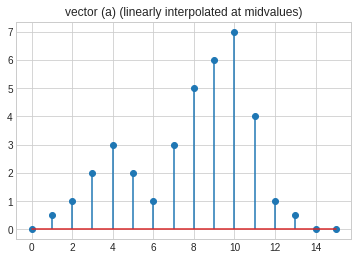

In [168]:
plt.stem(x,ainterleaved, use_line_collection=True)
plt.title('a interleaved')
plt.show()


ainterp = ndimage.convolve(ainterleaved,np.array([0.5,1,0.5]),mode='reflect')
len_ainterp, = np.shape(ainterp)


print(f'interpolated version of a (linear interp) = {ainterp}')


x = np.arange(0,len_ainterp)
plt.stem(x,ainterp,use_line_collection=True)
plt.title('vector (a) (linearly interpolated at midvalues)')
plt.show()


## Show linear interpolation using matrix multiplication

Matrix for linear interpolation:

[[1.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.5 1.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 1.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 1.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 1.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 1.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 1.  0.5 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 1.  0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5 1.  0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.5 1.  0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 1.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 1.  0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 1.  0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 1.  0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.

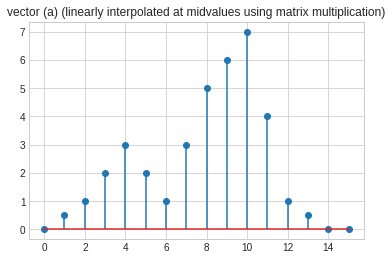

In [169]:
# Create matrix for interpolation as the sum of three diagonal matrices:
A1 = np.diag(np.repeat(1, len_ainterleaved))
A2 = np.diag(np.repeat(0.5, len_ainterleaved-1),k=1)
A3 = np.diag(np.repeat(0.5, len_ainterleaved-1),k=-1)
A = A1 + A2 + A3
print('Matrix for linear interpolation:\n')
print(A)

# matrix mult
ainterp2 = np.matmul(A,ainterleaved)

print(f'\n\n ainterp2 = {ainterp2}\n')

len_ainterp2, = np.shape(ainterp2)
x = np.arange(0,len_ainterp2)
plt.stem(x,ainterp2, use_line_collection=True)
plt.title('vector (a) (linearly interpolated at midvalues using matrix multiplication)')
plt.show()



# Interpolation in 2D

## Create a function for 2D interleaving (insertion of zeros)

### Interpolação num grid regular por convolução
Strategy:  Let $a$ be the input image.  Output image $b$.  

Get size of a.

Make $b$ with zeros, with twice the rows and twice the columns of $a$.

Put the values of $a$ into alternate columns and rows of $b$ $\rightarrow$ b[::2, ::2] = a .

In [170]:
import numpy as np
from scipy import ndimage


def interleave2(a):
    lin, col = a.shape
    b = np.zeros((2*lin, 2*col))
    b[::2, ::2] = a 
    return (b)

## Test interpolation function with a small matrix.

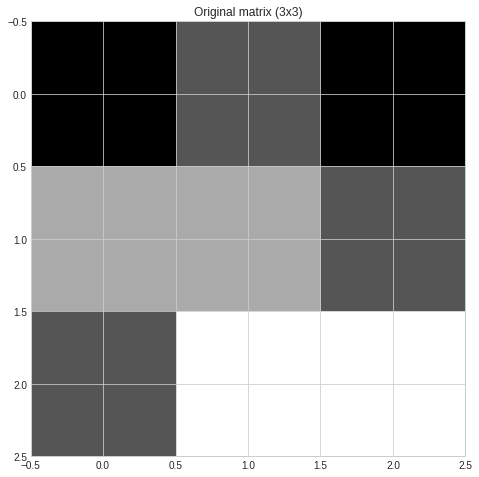

In [171]:
A = np.array([[1,2,1],    [3,3,2],    [2,4,4]])

plt.figure(figsize=(8,8))
plt.imshow(A,cmap='gray')
plt.title('Original matrix (3x3)')
plt.show()



### Interleaved with zeros:

 B = 
 [[1. 0. 2. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0.]
 [3. 0. 3. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0.]
 [2. 0. 4. 0. 4. 0.]
 [0. 0. 0. 0. 0. 0.]]


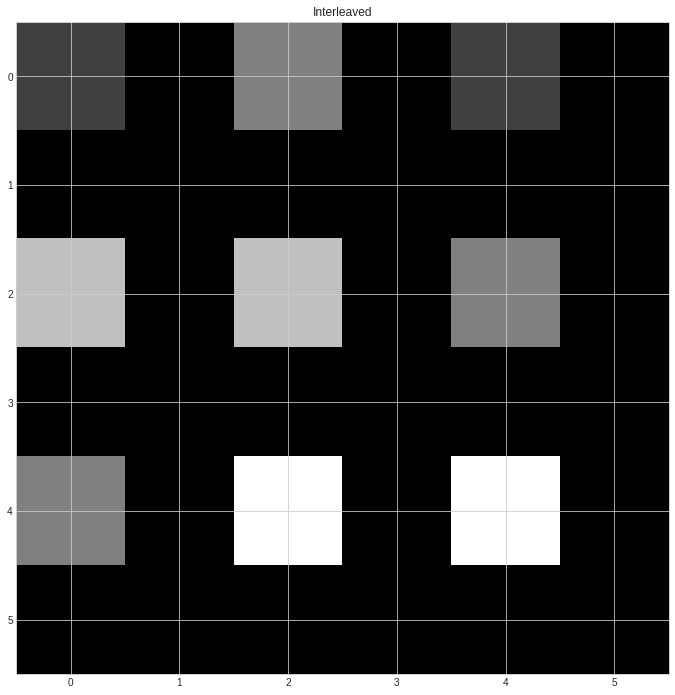

In [172]:
B = interleave2(A)
print(f' B = \n {B}')

plt.figure(figsize=(12,12))
plt.imshow(B,cmap='gray')
plt.title('Interleaved')
plt.show()



### Convolved with linear interpolation kernel

 C = 
 [[1.   1.5  2.   1.5  1.   0.5 ]
 [2.   2.25 2.5  2.   1.5  0.75]
 [3.   3.   3.   2.5  2.   1.  ]
 [2.5  3.   3.5  3.25 3.   1.5 ]
 [2.   3.   4.   4.   4.   2.  ]
 [1.   1.5  2.   2.   2.   1.  ]]


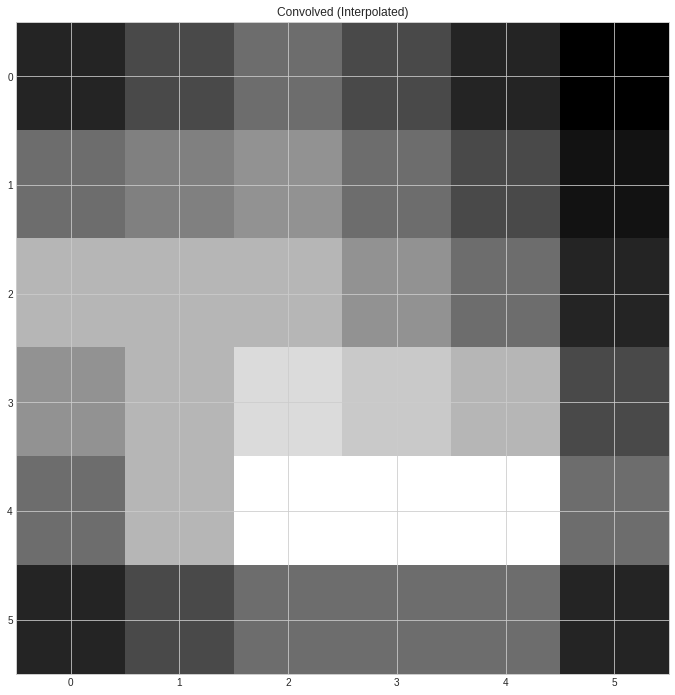

In [173]:
# Convolve with 2d kernel (pad with zeros)
intKer = np.array([[0.25,0.5,0.25],[0.5,1,0.5],[0.25,0.5,0.25]])
C = ndimage.convolve(B,intKer,  mode='constant', cval=0.0)
print(f' C = \n {C}')

plt.figure(figsize=(12,12))
plt.imshow(C,cmap='gray')
plt.title('Convolved (Interpolated)')
plt.show()

## Now test with full-size image.

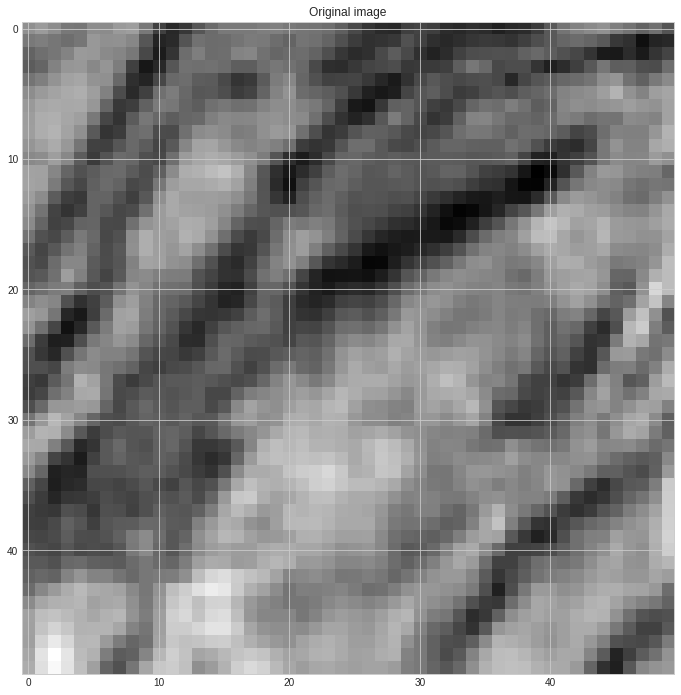

In [174]:
from skimage import data
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from scipy import ndimage

# import image from skimage
im=data.immunohistochemistry()

#convert to grayscale
grayIm = rgb2gray(im)
grayIm = grayIm[0:50,0:50]

plt.figure(figsize=(12,12))
plt.imshow(grayIm,cmap='gray')
plt.title('Original image')
plt.show()



## Interleave with zeros (2D)

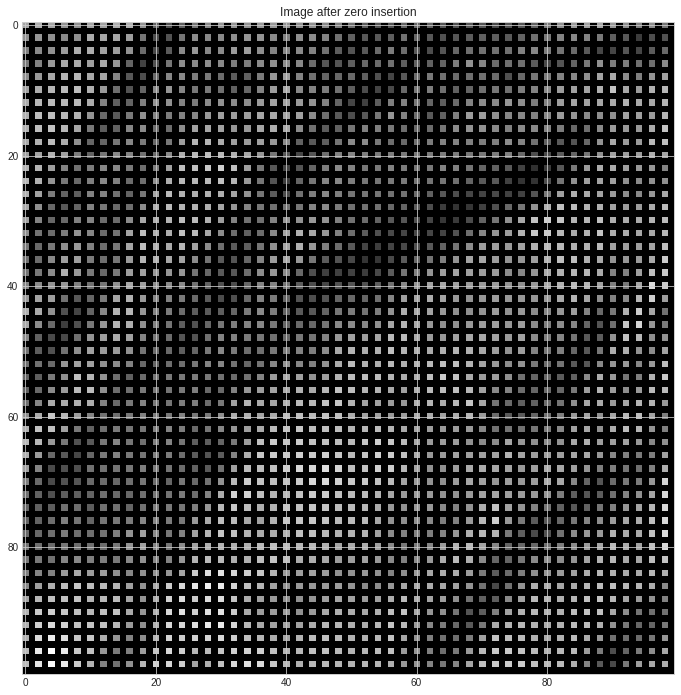

In [175]:

imInter = interleave2(grayIm)
plt.figure(figsize=(12,12))
plt.imshow(imInter,cmap='gray')
plt.title('Image after zero insertion')
plt.show()




## Convolve with linear interpolation kernel

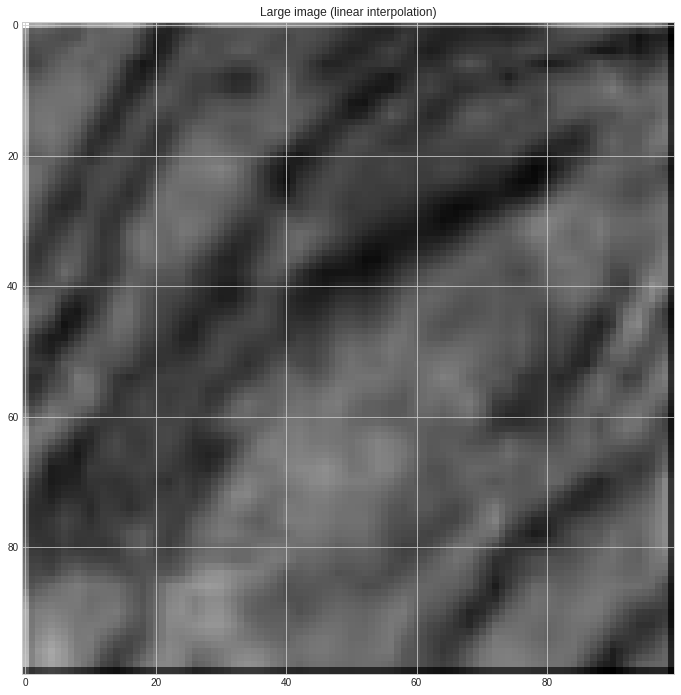

In [176]:

intKer = np.array([[0.25,0.5,0.25],[0.5,1,0.5],[0.25,0.5,0.25]])
largeim = ndimage.convolve(imInter,intKer, mode='reflect')
plt.figure(figsize=(12,12))
plt.imshow(largeim,cmap='gray')
plt.title('Large image (linear interpolation)')
plt.show()

## Show that we can implement linear interpolation as two separate processes:
linear interpolation along rows followed by linear interp along columns.

## Original image:

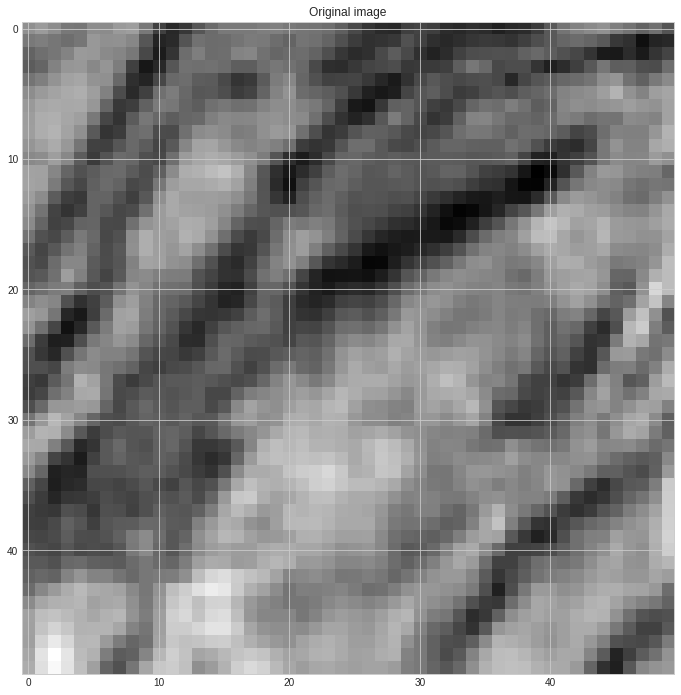

In [177]:
# import image from skimage
im=data.immunohistochemistry()

#convert to grayscale
grayIm = rgb2gray(im)
grayIm = grayIm[0:50,0:50]

plt.figure(figsize=(12,12))
plt.imshow(grayIm,cmap='gray')
plt.title('Original image')
plt.show()




### Interleave original image

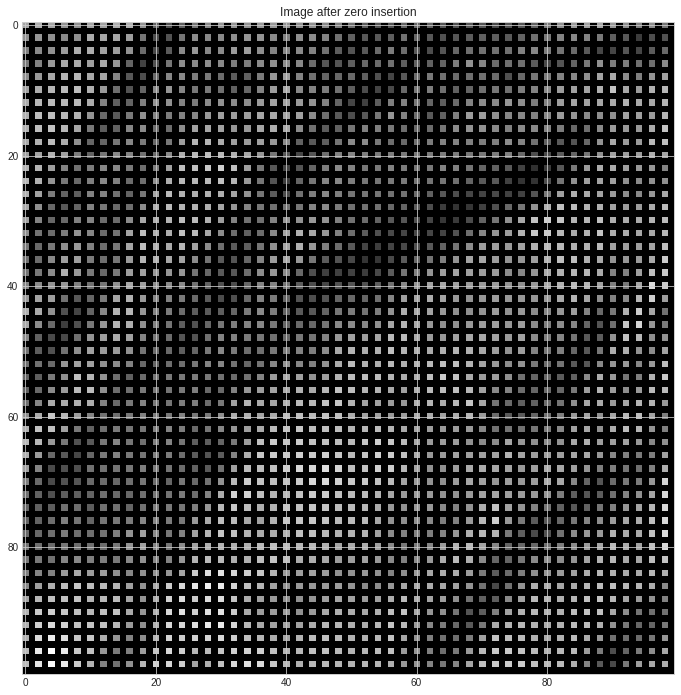

In [178]:

imInter = interleave2(grayIm)
plt.figure(figsize=(12,12))
plt.imshow(imInter,cmap='gray')
plt.title('Image after zero insertion')
plt.show()



### Convolve along the rows:

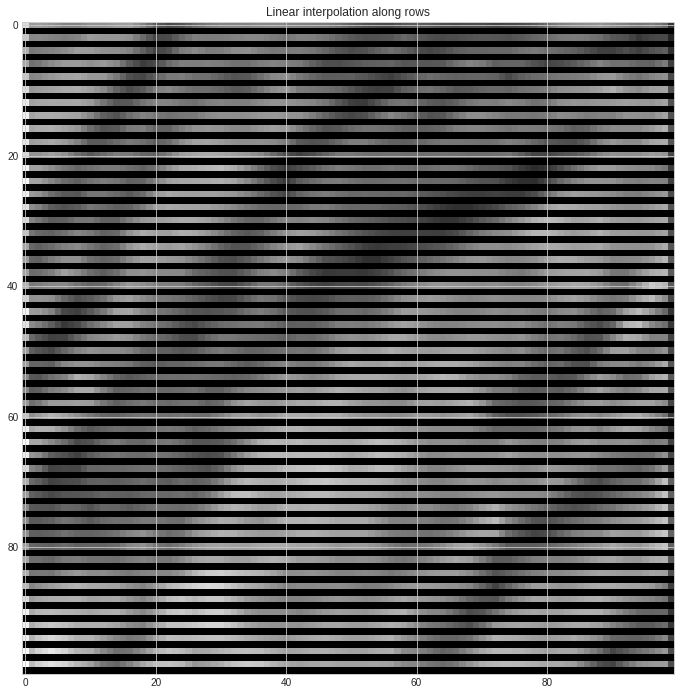

In [179]:


#Convolve with linear interpolation kernel - rows

intKer = np.array([[0.5,1,0.5]])
largeim = ndimage.convolve(imInter,intKer, mode='reflect')
plt.figure(figsize=(12,12))
plt.imshow(largeim,cmap='gray')
plt.title('Linear interpolation along rows')
plt.show()


### Now convolve along the columns

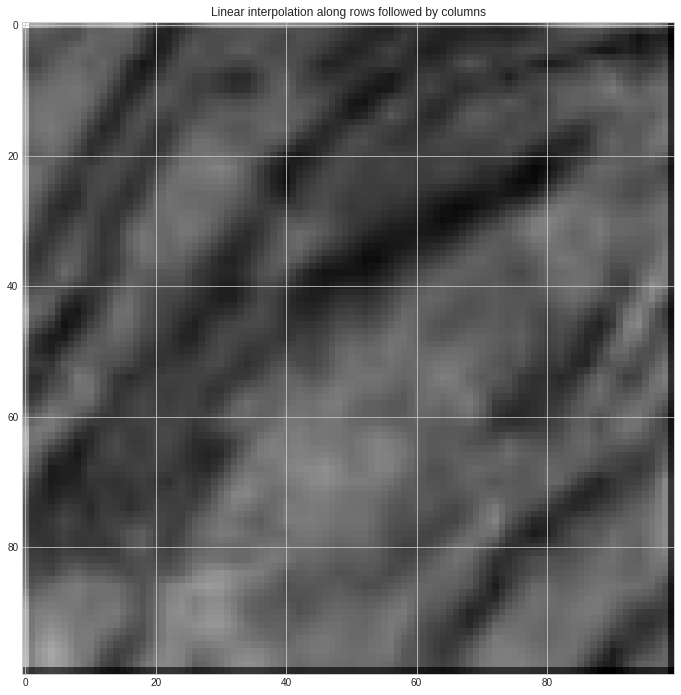

In [180]:

#Convolve with linear interpolation kernel - cols
intKer = np.array([[0.5],[1],[0.5]])
largeim = ndimage.convolve(largeim,intKer, mode='reflect')
plt.figure(figsize=(12,12))
plt.imshow(largeim,cmap='gray')
plt.title('Linear interpolation along rows followed by columns')
plt.show()

# Geometric transforms

## Forward Transform
###  First create pixels with meshgrid and plot them. 

U =
[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]
V =
[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]
X = 
[[-1. -1.  1.]
 [ 0. -1.  1.]
 [ 1. -1.  1.]
 [-1.  0.  1.]
 [ 0.  0.  1.]
 [ 1.  0.  1.]
 [-1.  1.  1.]
 [ 0.  1.  1.]
 [ 1.  1.  1.]]

 Third column of X would be the pixel value, but they are all = 1


(-1.5, 1.5)

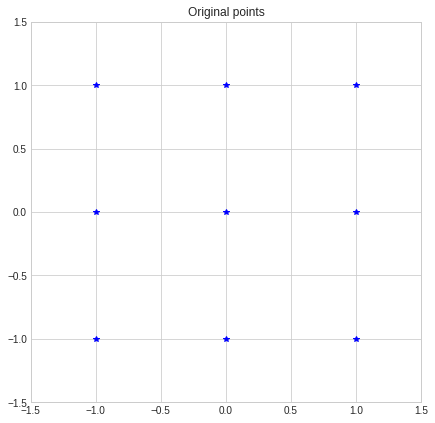

In [181]:
import numpy as np
import math
import matplotlib.pyplot as plt


#Create Coords, U,V
x = np.arange(-1,2)
y = np.arange(-1,2)
U,V= np.meshgrid(x,y)

print(f'U =\n{U}')
print(f'V =\n{V}')

#Create list of points, X, from U and V
X=np.zeros([9,3])
for i in range (0,3):
    for j in range (0,3):
        X[3*i+j,:] = np.array([U[i,j],V[i,j],1])

    
print(f'X = \n{X}')        
print('\n Third column of X would be the pixel value, but they are all = 1')    

fig, ((ax1)) = plt.subplots(1,1,figsize=(7,7))
ax1.plot(X[:,0],X[:,1],'b*')
ax1.set_title('Original points')
ax1.grid(True)
ax1.set_xlim([-1.5,1.5])
ax1.set_ylim([-1.5,1.5])

### Create forward transformation matrix, $T$ with 9 pixels (3x3)
### Rotate points by $+\frac{\pi}{6}$

In [182]:
theta = math.pi/6

#tranformation matrix, T
T=[[np.cos(theta),np.sin(theta),0],
[-np.sin(theta),np.cos(theta),0],
[0,0,1]];

print(f'Transformation matrix (Affine), T = \n {T} ' )


Transformation matrix (Affine), T = 
 [[0.8660254037844387, 0.49999999999999994, 0], [-0.49999999999999994, 0.8660254037844387, 0], [0, 0, 1]] 


### Transform pixel coordinates with matrix multiplication ($X$ with $T$)

Y = 
[[-0.3660254 -1.3660254  1.       ]
 [ 0.5       -0.8660254  1.       ]
 [ 1.3660254 -0.3660254  1.       ]
 [-0.8660254 -0.5        1.       ]
 [ 0.         0.         1.       ]
 [ 0.8660254  0.5        1.       ]
 [-1.3660254  0.3660254  1.       ]
 [-0.5        0.8660254  1.       ]
 [ 0.3660254  1.3660254  1.       ]]


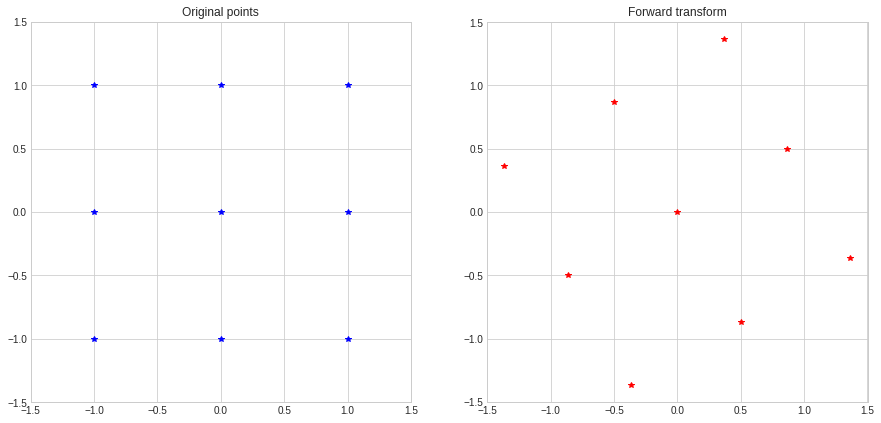

In [183]:
# Let Y be the transformed array of points.  Form values by matrix multiplication of X with T.       
Y = np.matmul(X,T)

print(f'Y = \n{Y}') 


# Plot X and Y
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(15,7))
ax1.plot(X[:,0],X[:,1],'b*')
ax1.set_title('Original points')
ax1.grid(True)
ax1.set_xlim([-1.5,1.5])
ax1.set_ylim([-1.5,1.5])

ax2.plot(Y[:,0],Y[:,1],'r*')
ax2.set_title('Forward transform')
ax2.grid(True)


## Inverse Transform

In [184]:

#Create Coords, U,V
x = np.arange(-1,2)
y = np.arange(-1,2)
U,V= np.meshgrid(x,y)


#Create list of points, X, from U and V
X=np.zeros([9,3])
for i in range (0,3):
    for j in range (0,3):
        X[3*i+j,:] = np.array([U[i,j],V[i,j],1])
 


###  Create INVERSE transformation matrix, $IT$
#### Notice the reverse of elements $-sen(\theta)$ and $sen(\theta)$ in elements (2,1) and (1,2)
#### This is because we are rotating in the opposite direction in the inverse transform and instead of $\theta$ we use $-\theta$. 
#### When we replace $\theta$ with $-\theta$, we have:  $cos(-\theta) = cos(\theta)$ and  $sen(-\theta) = -sen(\theta)$
### Rotate points by $-\frac{\pi}{6}$

In [185]:
theta = math.pi/6

#tranformation matrix, T
IT=[[np.cos(theta),-np.sin(theta),0],
[np.sin(theta),np.cos(theta),0],
[0,0,1]];


### Now perform transformation of $X$ with Inverse Transform, $IT$

(-1.5, 1.5)

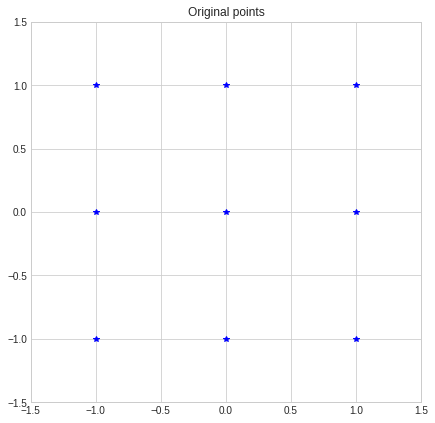

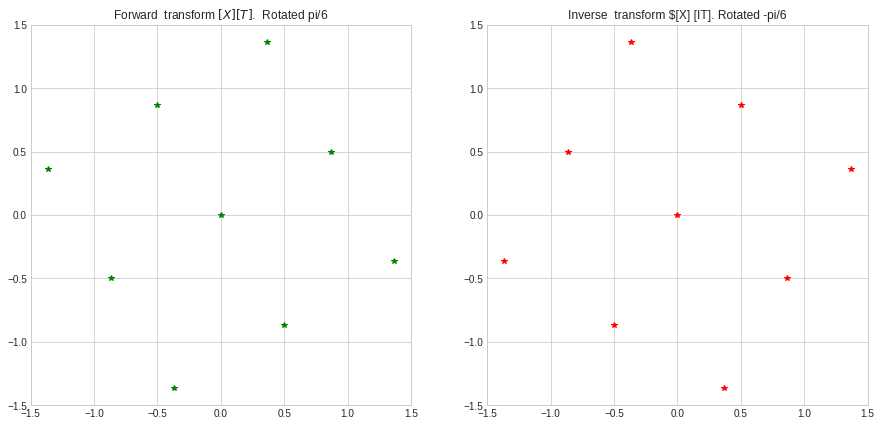

In [186]:
Y = np.matmul(X,IT)

# Plot X and Y
fig, ((ax1)) = plt.subplots(1,1,figsize=(7,7))
ax1.plot(X[:,0],X[:,1],'b*')
ax1.set_title('Original points')
ax1.grid(True)
ax1.set_xlim([-1.5,1.5])
ax1.set_ylim([-1.5,1.5])


#Take original matrix X, forward transform, then inverse transform

Y = np.matmul(X,T)


fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(15,7))
ax1.plot(Y[:,0],Y[:,1],'g*')
ax1.set_title('Forward  transform $[X] [T]$.  Rotated pi/6')
ax1.grid(True)
ax1.set_xlim([-1.5,1.5])
ax1.set_ylim([-1.5,1.5])

Y2 = np.matmul(X,IT)

ax2.plot(Y2[:,0],Y2[:,1],'r*')
ax2.set_title('Inverse  transform $[X] [IT]. Rotated -pi/6')
ax2.grid(True)
ax2.set_xlim([-1.5,1.5])
ax2.set_ylim([-1.5,1.5])

### Show effect of forward transform followed by inverse transform,  $(X T) [IT]$,  then inverse transform followed by forward Transform  $(X [IT]) T$
### $X$ is the matrix of points, $T$ is the forward transform, $[IT]$ is the inverse transform.
### Of course, the net effect is zero, since we rotate the points in one direction and then back to the original position. 

(-1.5, 1.5)

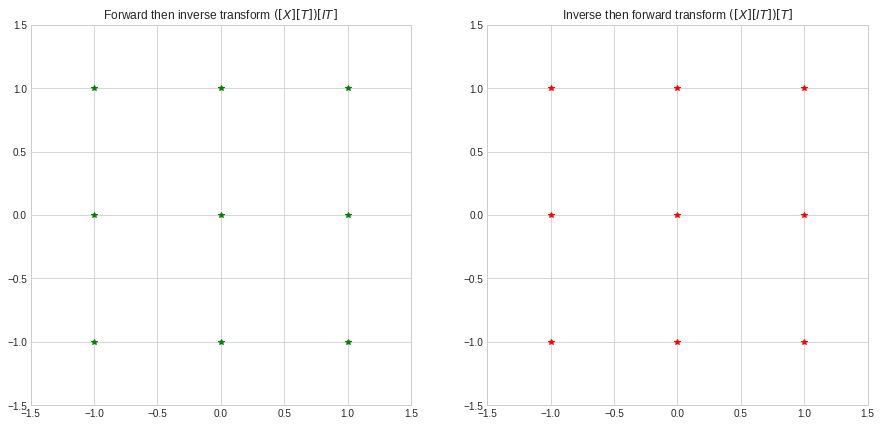

In [187]:
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(15,7))
ax1.plot(Z[:,0],Z[:,1],'g*')
ax1.set_title('Forward then inverse transform $([X] [T]) [IT]$')
ax1.grid(True)
ax1.set_xlim([-1.5,1.5])
ax1.set_ylim([-1.5,1.5])

Y2 = np.matmul(X,IT)
Z2 = np.matmul(Y2,T)
ax2.plot(Z2[:,0],Z2[:,1],'r*')
ax2.set_title('Inverse then forward transform $([X] [IT]) [T]$')
ax2.grid(True)
ax2.set_xlim([-1.5,1.5])
ax2.set_ylim([-1.5,1.5])

### Claro que $([X][IT])T$ = $[X]([IT][T])$ = $[X]$
### e  $([X][T])[IT$] = $[X]([T][IT])$ = $[X]$
### Dado que $[IT][T]=I$ e $[T][IT]=I$

# Rotation of image 
adapted from https://stackoverflow.com/questions/19684617/image-rotation-by-matlab-without-using-imrotate

Text(0.5, 1.0, 'Original image')

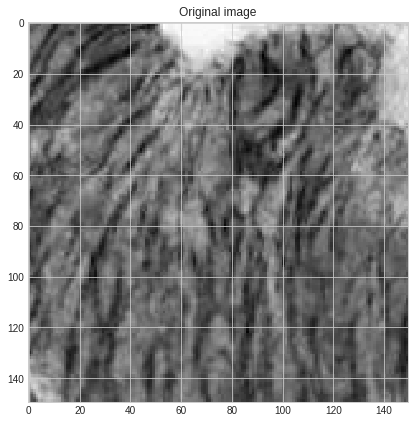

In [188]:
# Translated to Python3 by John Sims, 2/12/2019, from
# https://stackoverflow.com/questions/19684617/image-rotation-by-matlab-without-using-imrotate

import numpy as np
from skimage import data
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import math

#rotation:
theta = math.pi/6

# import image from skimage
im=data.immunohistochemistry()

#convert to grayscale
grayIm = rgb2gray(im)

# Take a portion of original image 
image = grayIm[0:150,0:150]


#Plot  portion of original image:        
fig, ((ax1)) = plt.subplots(1,1,figsize=(7,7))
ax1.imshow(image,cmap='gray')
ax1.set_title('Original image')



### Pad image with zeros.
### Maximum  image padding is: (i)  (width) $d-r$ and; (ii) (height) $d-c$, as shown in the class,
### where r = numer of rows, c = number of columns, d = length of diagonal ($\sqrt{(r^2+c^2)}$). 

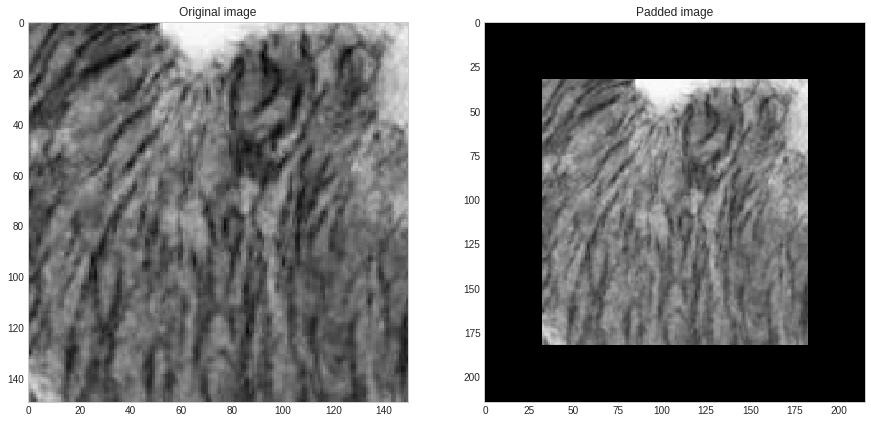

In [200]:
#image padding
Rows, Cols = np.shape(image);
Diagonal = np.sqrt(Rows**2 + Cols**2)
RowPad = (np.ceil(Diagonal - Rows) + 2).astype('int')
ColPad = (np.ceil(Diagonal - Cols) + 2).astype('int')
imagepad = np.zeros([Rows+RowPad, Cols+ColPad])
imagepad[np.int(np.ceil(RowPad/2)):np.int(np.ceil(RowPad/2)+Rows),
         np.int(np.ceil(ColPad/2)):np.int(np.ceil(ColPad/2)+Cols)] = image

RowImpad, ColImpad = np.shape(imagepad)

fig, ((ax1, ax2,)) = plt.subplots(1,2,figsize=(15,7))
ax1.imshow(image,cmap='gray')
ax1.set_title('Original image')
ax1.grid(False)
ax2.imshow(imagepad,cmap='gray')
ax2.set_title('Padded image')
ax2.grid(False)


### Notice that padded image is centred in the zero values, as we want.
### We can rotate the image without the pixels falling outside the frame.

In [211]:



# Find midpoints of padded output image
midx=np.ceil((RowImpad+1)/2).astype('int')
midy=np.ceil((ColImpad+1)/2).astype('int')

print(f'Midpoints of image are ({midx},{midy})')



Midpoints of image are (108,108)


### Create new matrix (image) size of Impad (zeros)
### For each (i,j) pair in imagerot, find a pair of integer coordinates (x,y) in imagepad (nearest neighbour interpolation)


In [227]:
imagerot= np.zeros([RowImpad, ColImpad]) # midx and midy same for both

for i in range (0, RowImpad):
    for j in range (0, ColImpad):

         x= (i-midx)*np.cos(theta)+(j-midy)*np.sin(theta)
         y=-(i-midx)*np.sin(theta)+(j-midy)*np.cos(theta)
         x=np.round(x) + midx
         y=np.round(y) + midy

         if (x>=0 and y>=0 and x<ColImpad and y<RowImpad):
              imagerot[i,j]=imagepad[x.astype('int'),y.astype('int')] #k degrees rotated image
         else:
            # Print discarded 'illegal values' 
            # these are zeros in Padded image, which we included to make padded image.
            # We can easily see that they lie outside the range of our new image.
            print(f'Values of (x,y)=({x},{y}) are outside imagepad limits, range [0,{RowImpad}) and [0,{ColImpad})')


Values of (x,y)=(-40.0,68.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(-39.0,69.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(-39.0,70.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(-38.0,71.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(-38.0,72.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(-37.0,73.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(-37.0,74.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(-36.0,75.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(-36.0,75.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(-35.0,76.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(-35.0,77.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(-34.0,78.0) are outside imagepad limits, range [0,215) and 

Values of (x,y)=(67.0,215.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(67.0,216.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(68.0,217.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(68.0,217.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(69.0,218.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(69.0,219.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(70.0,220.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(70.0,221.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(71.0,222.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(71.0,223.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(72.0,224.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(72.0,224.0) are outside imagepad limits, range [0,215) and 

Values of (x,y)=(114.0,215.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(115.0,216.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(115.0,217.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(116.0,218.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(116.0,219.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(117.0,219.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(117.0,220.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(118.0,221.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(118.0,222.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(119.0,223.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(119.0,224.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(115.0,215.0) are outside imagepad limits, range 

Values of (x,y)=(80.0,-1.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(81.0,-1.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(82.0,-2.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(82.0,-1.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(83.0,-2.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(83.0,-1.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(83.0,-3.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(84.0,-2.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(84.0,-1.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(84.0,-3.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(85.0,-2.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(85.0,-1.0) are outside imagepad limits, range [0,215) and [0,215)
Valu

Values of (x,y)=(108.0,-17.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(108.0,-16.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(109.0,-15.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(109.0,-14.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(110.0,-13.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(110.0,-12.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(111.0,-11.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(111.0,-10.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(112.0,-10.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(112.0,-9.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(113.0,-8.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(113.0,-7.0) are outside imagepad limits, range [0,

Values of (x,y)=(144.0,-2.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(144.0,-1.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(215.0,121.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(215.0,122.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(216.0,123.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(216.0,124.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(217.0,125.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(217.0,126.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(218.0,126.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(218.0,127.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(219.0,128.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(219.0,129.0) are outside imagepad limits, range [0

Values of (x,y)=(215.0,85.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(215.0,85.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(216.0,86.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(216.0,87.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(217.0,88.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(217.0,89.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(218.0,90.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(218.0,91.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(219.0,92.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(219.0,92.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(220.0,93.0) are outside imagepad limits, range [0,215) and [0,215)
Values of (x,y)=(220.0,94.0) are outside imagepad limits, range [0,215) and 

### Plot final results

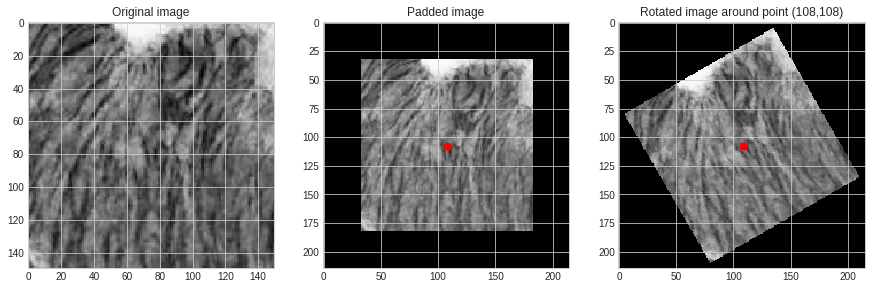

In [228]:
       
fig, ((ax1, ax2,ax3)) = plt.subplots(1,3,figsize=(15,7))
ax1.imshow(image,cmap='gray')
ax1.set_title('Original image')
ax2.imshow(imagepad,cmap='gray')
ax2.set_title('Padded image')
ax2.scatter(midx,midy, s=50, c='red', marker='o')# plot red dot at centre of image.
ax3.imshow(imagerot,cmap='gray')
ax3.set_title(f'Rotated image around point ({midx},{midy})')
ax3.scatter(midx,midy, s=50, c='red', marker='o')# plot red dot at centre of image.


## Inverse rotation using warp and Similarity Transformation
### A different function which we can use.
### Define transformation matrix using st command (create tform), then warp. 

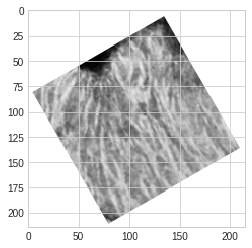

In [229]:
from skimage.transform import warp
from skimage.transform import SimilarityTransform as st
import matplotlib.pyplot as plt

tform = st(scale=1.0, rotation=np.pi/6,translation=(70, -40))
warped = warp(imagepad, tform)

plt.imshow(warped)
plt.show()


#  Image registration with opencv


Images to be registered. Images are different in time, and have been scaled, rotated and translated.


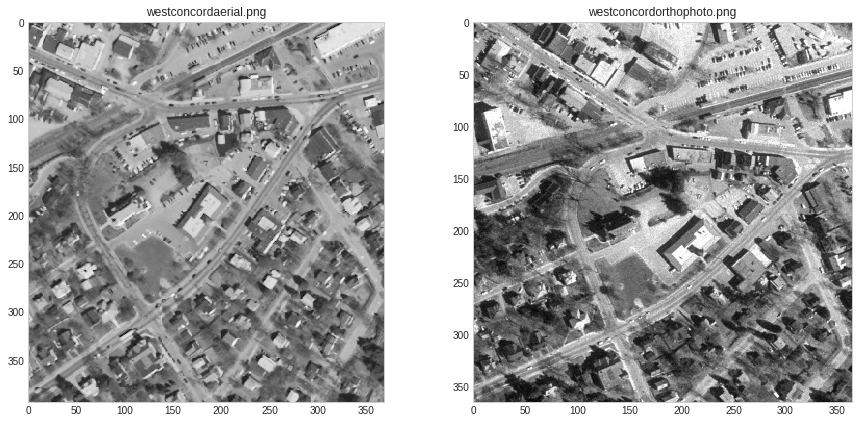

In [236]:

# Program downloaded from:
# https://www.geeksforgeeks.org/image-registration-using-opencv-python/
    
import matplotlib.pyplot as plt
import cv2 
import numpy as np 
  
# Open the image files. 
img1_color = cv2.imread("../../Images/westconcordaerial.png")  # Image to be aligned. 
img2_color = cv2.imread("../../Images/westconcordorthophoto.png")    # Reference image. 
  
# Convert to grayscale. 
img1 = cv2.cvtColor(img1_color, cv2.COLOR_BGR2GRAY) 
img2 = cv2.cvtColor(img2_color, cv2.COLOR_BGR2GRAY) 
height, width = img2.shape 

print('Images to be registered. Images are different in time, and have been scaled, rotated and translated.')
fig, ((ax1, ax2,)) = plt.subplots(1,2,figsize=(15,7))
ax1.imshow(img1,cmap='gray')
ax1.set_title('westconcordaerial.png')
ax1.grid(False)
ax2.imshow(img2,cmap='gray')
ax2.set_title('westconcordorthophoto.png')
ax2.grid(False)


### Register images based on keypoints found in both

Plot registered images.


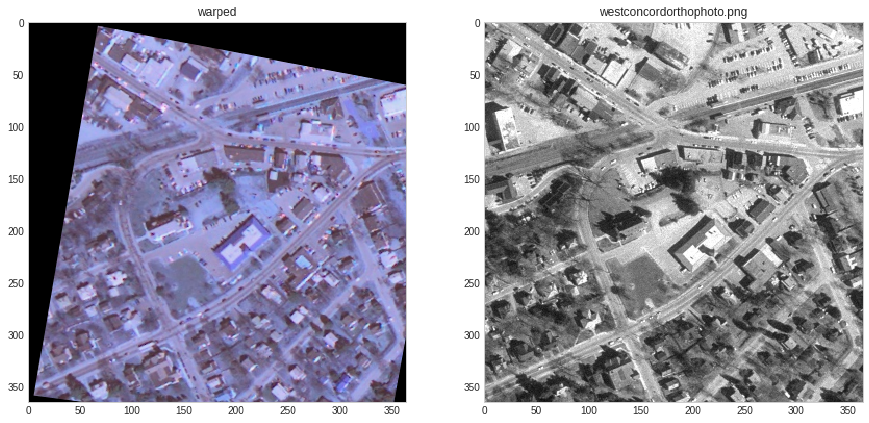

In [239]:
# Create ORB detector with 5000 features. 
orb_detector = cv2.ORB_create(5000) 
  
# Find keypoints and descriptors. 
# The first arg is the image, second arg is the mask 
#  (which is not reqiured in this case). 
kp1, d1 = orb_detector.detectAndCompute(img1, None) 
kp2, d2 = orb_detector.detectAndCompute(img2, None) 
  
# Match features between the two images. 
# We create a Brute Force matcher with  
# Hamming distance as measurement mode. 
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True) 
  
# Match the two sets of descriptors. 
matches = matcher.match(d1, d2) 
  
# Sort matches on the basis of their Hamming distance. 
matches.sort(key = lambda x: x.distance) 
  
# Take the top 90 % matches forward. 
matches = matches[:int(len(matches)*90)] 
no_of_matches = len(matches) 
  
# Define empty matrices of shape no_of_matches * 2. 
p1 = np.zeros((no_of_matches, 2)) 
p2 = np.zeros((no_of_matches, 2)) 
  
for i in range(len(matches)): 
  p1[i, :] = kp1[matches[i].queryIdx].pt 
  p2[i, :] = kp2[matches[i].trainIdx].pt 
  
# Find the homography matrix. 
homography, mask = cv2.findHomography(p1, p2, cv2.RANSAC) 
  
# Use this matrix to transform the 
# colored image wrt the reference image. 
transformed_img = cv2.warpPerspective(img1_color, 
                    homography, (width, height)) 
  


print('Plot registered images.')
fig, ((ax1, ax2,)) = plt.subplots(1,2,figsize=(15,7))
ax1.imshow(transformed_img,cmap='gray')
ax1.set_title('warped')
ax1.grid(False)
ax2.imshow(img2_color,cmap='gray')
ax2.set_title('westconcordorthophoto.png')
ax2.grid(False)

# Save the output. 
#cv2.imwrite('output.jpg', transformed_img)

## Define manual control points on the images

Please click
clicked [(310.1900203997162, 83.06657994323552), (359.6962881385998, 278.1795175023652), (127.89046978476821, 288.6631977294229), (113.91222948202463, 92.96783349101224)]
Please click
clicked [(339.2998980014191, 130.14936140018915), (353.90786867313153, 309.23226111636706), (139.11659620387888, 283.26253547776724), (163.4632139900662, 109.0489593188268)]


[[ 8.79461226e-01 -2.09474279e-01  8.03521545e+01]
 [ 1.49974054e-01  8.17404133e-01  1.43690153e+01]
 [ 1.28780473e-05 -1.73972638e-04  1.00000000e+00]]


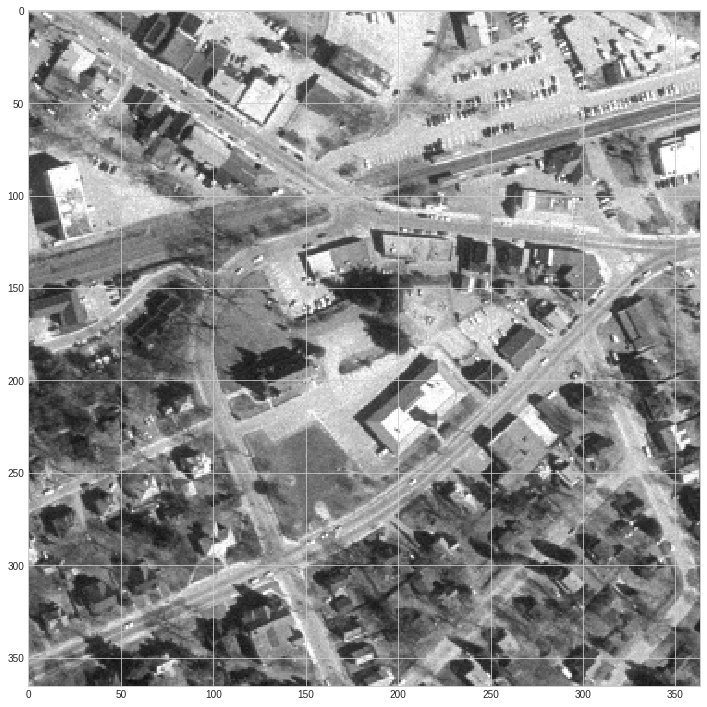

In [261]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('TkAgg')

t = np.arange(10)
plt.imshow(img1_color)
print("Please click")
x1 = plt.ginput(4)
print("clicked", x1)
#plt.show()

plt.imshow(img2_color)
print("Please click")
x2 = plt.ginput(4)
print("clicked", x2)



### print out points defined in image

In [265]:
for i in range(len(x1)):
    print(f'{i} {x1[i]}')
    
for i in range(len(x2)):
    print(f'{i} {x2[i]}')
    


0 (310.1900203997162, 83.06657994323552)
1 (359.6962881385998, 278.1795175023652)
2 (127.89046978476821, 288.6631977294229)
3 (113.91222948202463, 92.96783349101224)
0 (339.2998980014191, 130.14936140018915)
1 (353.90786867313153, 309.23226111636706)
2 (139.11659620387888, 283.26253547776724)
3 (163.4632139900662, 109.0489593188268)


### Find the transformation matrix, h

In [266]:
print("\n")
h, status = cv2.findHomography(np.float32(x1), np.float32(x2))

print(h)




[[ 8.79461226e-01 -2.09474279e-01  8.03521545e+01]
 [ 1.49974054e-01  8.17404133e-01  1.43690153e+01]
 [ 1.28780473e-05 -1.73972638e-04  1.00000000e+00]]


### Now warp image and print warped image against 

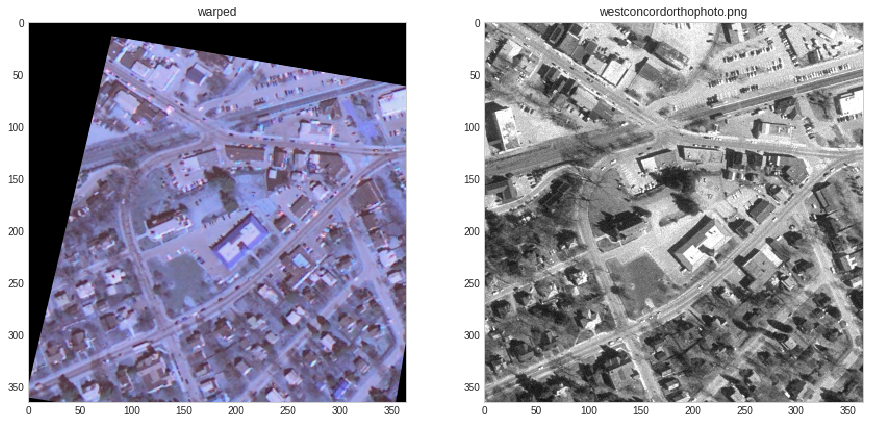

In [262]:

transformed_img = cv2.warpPerspective(img1_color,  h, (width, height) );

fig, ((ax1, ax2,)) = plt.subplots(1,2,figsize=(15,7))
ax1.imshow(transformed_img,cmap='gray')
ax1.set_title('warped')
ax1.grid(False)
ax2.imshow(img2_color,cmap='gray')
ax2.set_title('westconcordorthophoto.png')
ax2.grid(False)



## Linear Interpolation on grid:

In [274]:
r00_00=0.0
r00_10=5.0
r10_00=6.0
r10_10=7.0

r02_00 = 0.8*r00_00 + 0.2*r10_00
r02_10 = 0.8*r00_10 + 0.2*r10_10
r02_09 = 0.1*r02_00 + 0.9*r02_10

print(r02_09)



4.98
